In [1]:
from aiml import MLModels

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

/Users/edavid/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
MLModels.n_trials = 5 # Change n_trials for all models, lazy to wait so setting this to a low value
m = MLModels.run_classifier(cancer.data, cancer.target, cancer.feature_names)

KNN



Logistic Regression (L1)



Logistic Regression (L2)



SVC (L1)



SVC (L2)



                      Model  Accuracy        Parameter         Feature
0                       KNN  0.934266  n_neighbors = 6            None
1  Logistic Regression (L1)  0.966434           C = 20  mean perimeter
2  Logistic Regression (L2)  0.959441          C = 300  mean perimeter
3                  SVC (L1)  0.972028            C = 3  mean perimeter
4                  SVC (L2)  0.960839           C = 15    worst radius


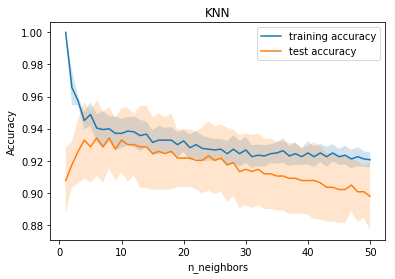

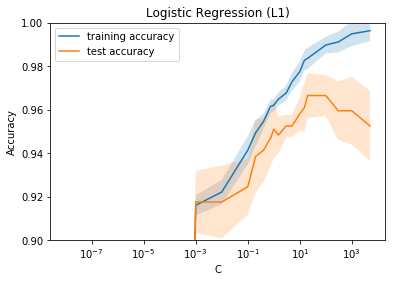

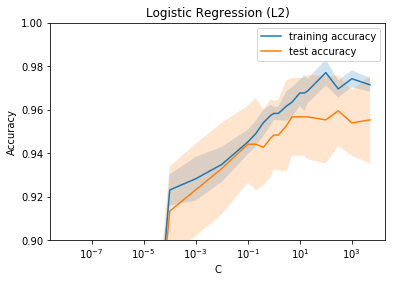

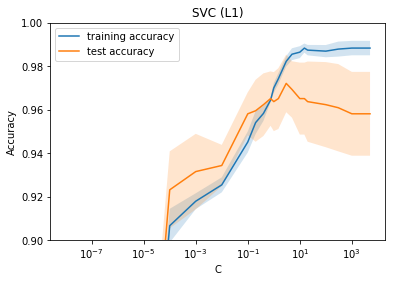

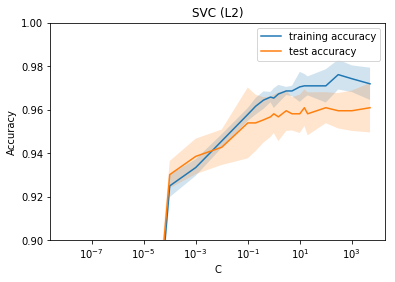

In [4]:
for k in m:
    ax = m[k].plot_accuracy()
    ax.set_title(k)
    if k != 'KNN':
        ax.set_ylim(0.9, 1)
        ax.set_xscale('log')